# SCAN ROI Plots

Plots of the predicted bottom, middle and top SCAN ROI fMRI signals from lagged copies of physiological time coureses - respiratory amplitude, eog amplitude and emg amplitude.

The following command-line script should be run before running this notebook:

`python main.py -a roi-multivariate`

In [30]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

## Extract results from pickle

In [98]:
# Load SCAN ROI Predictions
fp = '../results/main/roi_mdlm.pkl'

with open(fp, 'rb') as f:
    data = pickle.load(f)

# extract bootstrapped mean and std
pred_mean = data['pred']
pred_std = data['std']

# hardcoded labels of bottom, middle and top SCAN ROIs
roi_labels = [
    'bottom left',
    'middle left',
    'top left',
    'bottom right',
    'middle right',
    'top right'
]
# print to ensure order of roi labels matches file paths in data['roi']
print('ensure order matches:')
print(roi_labels)
print(data['roi'])


ensure order matches:
['bottom left', 'middle left', 'top left', 'bottom right', 'middle right', 'top right']
['template/scan_roi_lh_BOTTOM.label.gii', 'template/scan_roi_lh_MIDDLE.label.gii', 'template/scan_roi_lh_TOP.label.gii', 'template/scan_roi_rh_BOTTOM.label.gii', 'template/scan_roi_rh_MIDDLE.label.gii', 'template/scan_roi_rh_TOP.label.gii']


## Plot Results

In [45]:
# print evaluated predictions
print(data['pred'].keys())
# prediction labels specify the value of each physiological signal
# Resp, EOG, EMG
# v000: 0, 0, 0
# v200: 2, 0, 0
# v020: 0, 2, 0
# v002: 0, 0, 2
# v220: 2, 2, 0
# v202: 2, 0, 2
# v022: 0, 2, 2
# v222: 2, 2, 2

dict_keys(['v200', 'v020', 'v002', 'v220', 'v202', 'v022', 'v222'])


/var/folders/1h/7cb3drr10dz9ct35lt0qyds00000gn/T/ipykernel_55912/908181010.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


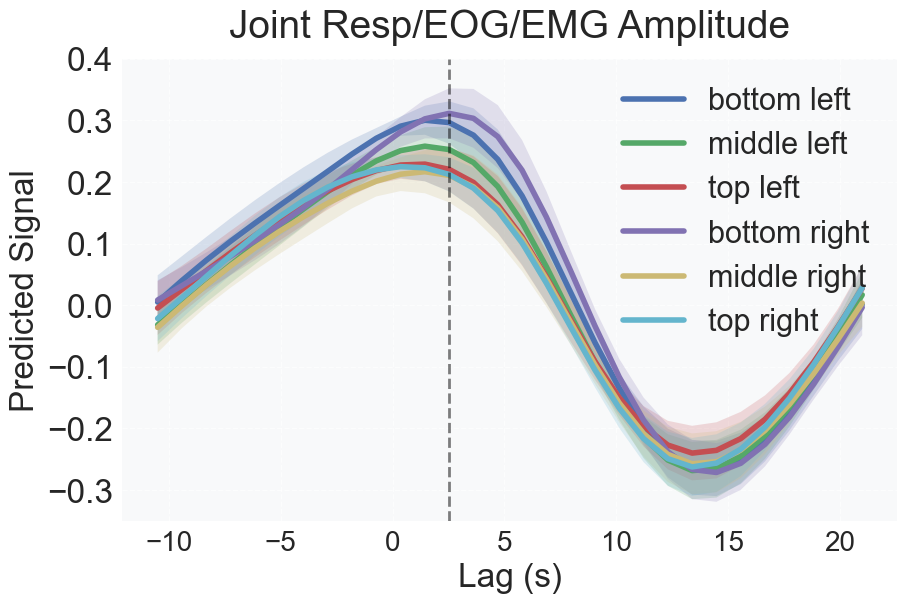

In [88]:
tr = 2.1 # vanderbilt tr
selected_lag_indx = 12
pred_vals = 'v222'

# Set style for a more professional look
plt.style.use('seaborn')

# Create figure with specific size and higher DPI
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Customize grid
ax.grid(True, linestyle='--', alpha=0.7)

# Set labels and title
ax.set_xlabel('Lag (s)', fontsize=24)
ax.set_ylabel('Predicted Signal', fontsize=24)
ax.set_title(f'Joint Resp/EOG/EMG Amplitude', fontsize=28, pad=15)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# plot mean
ax.plot(
    data['pred_lags'] * tr,
    data['pred'][pred_vals],
    label=roi_labels,
    linewidth=4
)
# plot std
roi_n = data['pred'][pred_vals].shape[1]
for i in range(roi_n):
    ax.fill_between(
        data['pred_lags']*tr,
        data['pred'][pred_vals][:,i] - data['std'][pred_vals][:,i],
        data['pred'][pred_vals][:,i] + data['std'][pred_vals][:,i],
        alpha=0.2
    )
# plot selected lag
ax.axvline(
    data['pred_lags'][selected_lag_indx] * tr,
    color='black',
    linestyle='--',
    linewidth=2,
    alpha=0.5
)
ax.set_ylim(-0.35, 0.4)
plt.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=24)
plt.show()